In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [31]:
df = pd.read_csv('../../../data/processed/land_dataset_final_v2.csv')

In [32]:
df.head()

,address_subdivision,address_locality,address_line_2,h_id,price_per_m2,land_area,price,longitude,latitude,near_Koh_Pich_in_km,...,f_road,f_secondary,f_service,f_steps,f_tertiary,f_track,f_trunk,f_trunk_link,f_unclassified,f_unused
0,Phnom Penh,Mean Chey,Stueng Mean Chey,8865846a91fffff,3068.33,52,52,104.883100,11.552932,6,...,0,1,1,0,0,0,0,0,0,0
1,Phnom Penh,Chamkar Mon,Phsar Daeum Thkov,8865846acbfffff,3632.23,178,178,104.915003,11.528833,3,...,0,0,0,0,0,0,0,0,0,0
2,Phnom Penh,Saensokh,Phnom Penh Thmei,88658468cbfffff,3123.13,138,138,104.886163,11.586713,7,...,0,0,1,0,0,0,0,0,0,0
3,Phnom Penh,Saensokh,Phnom Penh Thmei,8865846ab1fffff,3434.37,162,162,104.889529,11.575790,6,...,0,0,0,0,0,0,0,0,0,0
4,Phnom Penh,Doun Penh,Chakto Mukh,8865846a39fffff,3855.90,200,200,104.958218,11.558388,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
grouped = df.groupby('h_id')['price_per_m2']
df['h3_price_mean'] = df['h_id'].map(grouped.mean())
df['h3_price_max'] = df['h_id'].map(grouped.max())
df['h3_price_median'] = df['h_id'].map(grouped.median())
df['h3_price_min'] = df['h_id'].map(grouped.min())

In [34]:
# df.drop(columns=['price', 'land_area', 'geometry','longitude', 'latitude', 'h_id'], inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
y = df[['price_per_m2']]
X = df.drop(columns=['price_per_m2','price', 'land_area', 'geometry','longitude', 'latitude', 'h_id'])

In [37]:
X.describe()

,near_Koh_Pich_in_km,Koh_Pich_nearest,Koh_Pich_1_2km,Koh_Pich_2_3km,Koh_Pich_3_5km,Koh_Pich_5_10km,near_Russian_Market_in_km,Russian_Market_nearest,Russian_Market_1_2km,Russian_Market_2_3km,...,f_tertiary,f_track,f_trunk,f_trunk_link,f_unclassified,f_unused,h3_price_mean,h3_price_max,h3_price_median,h3_price_min
count,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,...,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.0,9272.000000,9272.000000,9272.000000,9272.000000
mean,10.564280,0.009275,0.038827,0.068162,0.121009,0.216458,9.185936,0.027071,0.063525,0.078192,...,0.223469,0.080242,0.041523,0.006579,0.078732,0.0,1928.229895,2587.963900,1926.231268,1186.179108
std,6.348214,0.095866,0.193192,0.252038,0.326156,0.411852,5.811844,0.162298,0.243917,0.268489,...,0.416592,0.271681,0.199507,0.080848,0.269334,0.0,2140.489045,2951.164142,2171.965447,1251.612353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,77.260000,85.520000,83.650000,23.320000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,371.586000,507.815000,310.360000,199.370000
50%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,895.989182,1261.870000,871.435000,555.240000
75%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3206.503721,3781.960000,3206.980000,2046.440000
max,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,8524.270320,11796.000000,9125.270000,5871.690000


In [38]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train.shape, X_test.shape

In [39]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns


In [40]:
cat_cols

Index(['address_subdivision', 'address_locality', 'address_line_2'], dtype='object')

In [41]:
# Temporarily encode categorical columns for feature selection
X_temp = X.copy()
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    X_temp[cat_cols] = encoder.fit_transform(X_temp[cat_cols])


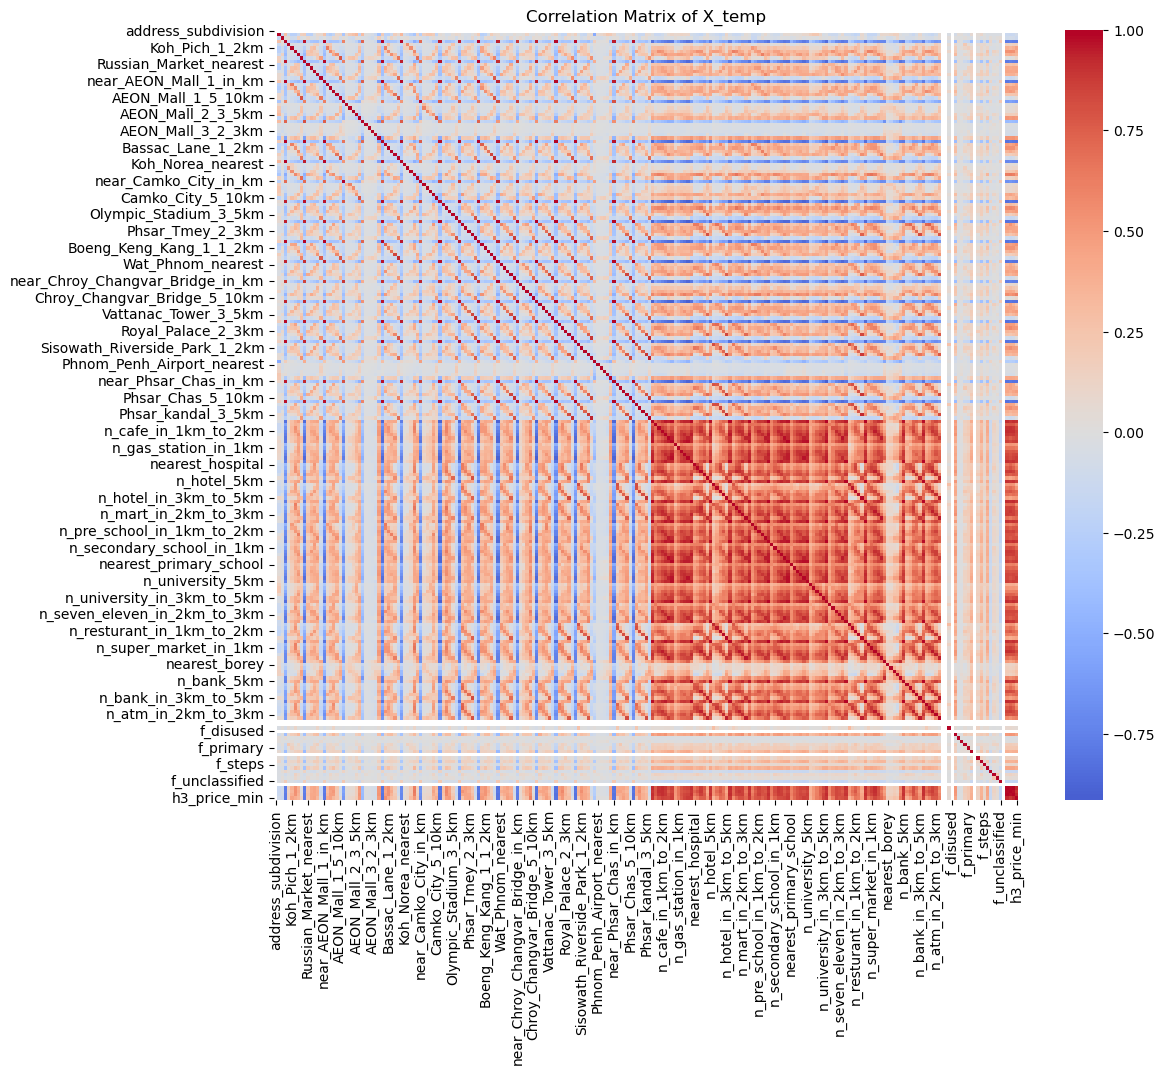

In [42]:
import seaborn as sns

# Compute correlation matrix for X_temp
corr_matrix = X_temp.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of X_temp')
plt.show()

In [43]:
# Feature selection 
selector = SelectKBest(mutual_info_regression, k=30)
selector.fit(X_temp, y)
selected_features = X.columns[selector.get_support()]


d:\anaconda\envs\env_v3.10\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
# Subset original data to selected features
X_selected = X[selected_features]

In [45]:
cat_cols = X_selected.select_dtypes(include=['object', 'category']).columns


In [46]:
# Temporarily encode categorical columns for feature selection
X_temp = X_selected.copy()
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    X_temp[cat_cols] = encoder.fit_transform(X_temp[cat_cols])


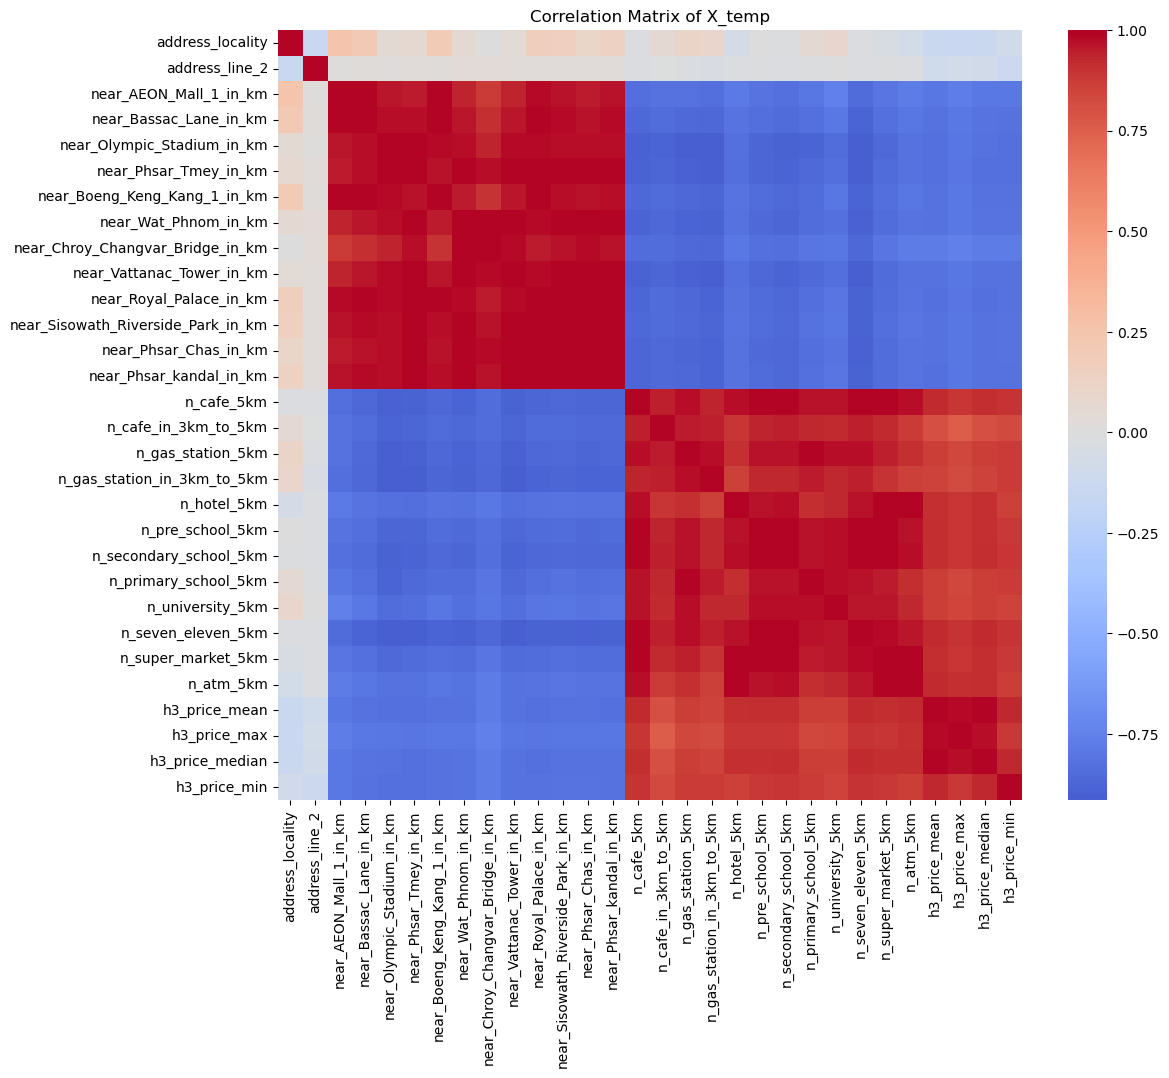

In [47]:

# Compute correlation matrix for X_temp
corr_matrix = X_temp.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of X_temp')
plt.show()

In [48]:
X_selected

,address_locality,address_line_2,near_AEON_Mall_1_in_km,near_Bassac_Lane_in_km,near_Olympic_Stadium_in_km,near_Phsar_Tmey_in_km,near_Boeng_Keng_Kang_1_in_km,near_Wat_Phnom_in_km,near_Chroy_Changvar_Bridge_in_km,near_Vattanac_Tower_in_km,...,n_secondary_school_5km,n_primary_school_5km,n_university_5km,n_seven_eleven_5km,n_super_market_5km,n_atm_5km,h3_price_mean,h3_price_max,h3_price_median,h3_price_min
0,Mean Chey,Stueng Mean Chey,5,4,3,4,4,4,5,4,...,73,92,108,32,82,582,3011.727778,3240.50,3047.460,2622.25
1,Chamkar Mon,Phsar Daeum Thkov,2,2,3,4,2,5,6,4,...,61,62,59,32,79,625,3818.351026,4961.91,3806.730,2560.65
2,Saensokh,Phnom Penh Thmei,6,5,3,3,5,3,3,3,...,61,69,100,25,69,614,3702.541837,4619.43,3593.130,3059.76
3,Saensokh,Phnom Penh Thmei,5,4,2,3,4,3,3,3,...,75,83,110,34,93,760,3308.530714,4527.88,3242.455,2855.43
4,Doun Penh,Chakto Mukh,3,3,5,4,3,4,5,4,...,34,24,23,21,64,559,3963.536364,5619.81,3973.660,1745.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,Chraoy Chongvar,Bak Kaeng,17,16,15,14,16,14,12,14,...,0,0,0,3,0,0,615.868333,699.64,636.920,496.69
9268,Chraoy Chongvar,Preaek Ta Sek,13,13,12,11,13,10,9,10,...,3,2,1,7,0,0,898.133333,1685.02,895.275,407.13
9269,Praek Pnov,Ponsang,21,20,18,18,20,18,18,18,...,0,0,0,0,0,0,201.678889,251.75,184.580,167.49
9270,Pur SenChey,Kantaok,16,15,14,15,15,15,16,15,...,3,2,1,3,0,0,1007.350667,1238.65,1020.120,792.92


In [49]:
# One-hot encode only the selected categorical features
selected_cat_cols = [col for col in selected_features if col in cat_cols]
X_final = pd.get_dummies(X_selected, columns=selected_cat_cols, drop_first=True)

# Only convert one-hot columns to int
one_hot_cols = [col for col in X_final.columns if any(cat in col for cat in selected_cat_cols)]
X_final[one_hot_cols] = X_final[one_hot_cols].astype(int)

In [50]:
X_final

,near_AEON_Mall_1_in_km,near_Bassac_Lane_in_km,near_Olympic_Stadium_in_km,near_Phsar_Tmey_in_km,near_Boeng_Keng_Kang_1_in_km,near_Wat_Phnom_in_km,near_Chroy_Changvar_Bridge_in_km,near_Vattanac_Tower_in_km,near_Royal_Palace_in_km,near_Sisowath_Riverside_Park_in_km,...,address_line_2_Tuek Thla,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum
0,5,4,3,4,4,4,5,4,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2,2,3,4,2,5,6,4,4,4,...,0,0,0,0,0,0,0,0,0,0
2,6,5,3,3,5,3,3,3,5,5,...,0,0,0,0,0,0,0,0,0,0
3,5,4,2,3,4,3,3,3,4,4,...,0,0,0,0,0,0,0,0,0,0
4,3,3,5,4,3,4,5,4,3,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,17,16,15,14,16,14,12,14,15,14,...,0,0,0,0,0,0,0,0,0,0
9268,13,13,12,11,13,10,9,10,11,11,...,0,0,0,0,0,0,0,0,0,0
9269,21,20,18,18,20,18,18,18,20,20,...,0,0,0,0,0,0,0,0,0,0
9270,16,15,14,15,15,15,16,15,16,16,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_KBest = pd.concat([X_final, y], axis=1)


In [52]:
df_KBest.head()

,near_AEON_Mall_1_in_km,near_Bassac_Lane_in_km,near_Olympic_Stadium_in_km,near_Phsar_Tmey_in_km,near_Boeng_Keng_Kang_1_in_km,near_Wat_Phnom_in_km,near_Chroy_Changvar_Bridge_in_km,near_Vattanac_Tower_in_km,near_Royal_Palace_in_km,near_Sisowath_Riverside_Park_in_km,...,address_line_2_Tumnob Tuek,address_line_2_Tuol Sangke,address_line_2_Tuol Svay Prey Ti Muoy,address_line_2_Tuol Svay Prey Ti Pir,address_line_2_Tuol Tumpung Ti Muoy,address_line_2_Tuol Tumpung Ti Pir,address_line_2_Veal Sbov,address_line_2_Veal Vong,address_line_2_Voat Phnum,price_per_m2
0,5,4,3,4,4,4,5,4,5,5,...,0,0,0,0,0,0,0,0,0,3068.33
1,2,2,3,4,2,5,6,4,4,4,...,0,0,0,0,0,0,0,0,0,3632.23
2,6,5,3,3,5,3,3,3,5,5,...,0,0,0,0,0,0,0,0,0,3123.13
3,5,4,2,3,4,3,3,3,4,4,...,0,0,0,0,0,0,0,0,0,3434.37
4,3,3,5,4,3,4,5,4,3,3,...,0,0,0,0,0,0,0,0,0,3855.90


In [53]:
df_KBest.to_csv('../../../data/preprocessed/land_dataset_final_feature_selection_Kbest_v1.csv', index=False)